In [ ]:
# Prerequisite to run this program on Colab.
# Remove this cell otherwise.
from google.colab import drive
drive.mount('/content/gdrive')

# Replace the link with your own file path.
%cd /content/gdrive/My\ Drive/HKBU/EDA/COMP3115/src

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1Ywe5jCwvzFrD9KR7N2H8CsnRkMiEcf9w/COMP3115/src


In [1]:
import numpy as np, pandas as pd
pd.set_option("display.max_rows", 1000)

In [3]:
gsheet_id = "1-wDj6lcwHLj1MD8AKSjYK7FfWdPXMOO0RXfIzcTuwgM"
gsheet_url = "https://docs.google.com/spreadsheets/d/%s/gviz/tq?tqx=out:csv&sheet=%s" % (gsheet_id, "manufacturing")
manufacturing = pd.read_csv(gsheet_url)
manufacturing = manufacturing[["DATEF","AMTMNO"]]
manufacturing["DATEF"] = manufacturing["DATEF"].astype(str)
manufacturing.rename(columns = {"DATEF":"formatted_month",
                                "AMTMNO":"manufacturing"}, inplace=True)

ParserError: ignored

In [4]:
gsheet_id = "1l_DSgerVwUxXJ5zK0QRsJ8yBGkmuQoAYEuyPP9XMhhQ"
gsheet_url = "https://docs.google.com/spreadsheets/d/%s/gviz/tq?tqx=out:csv&sheet=%s" % (gsheet_id, "us_covid")
covid = pd.read_csv(gsheet_url)
covid = covid[['new_cases','new_deaths','formatted_date']]
covid = covid.fillna(0)
covid = covid.head(366+365)

ParserError: ignored

In [ ]:
snp = pd.read_excel("../data/s&p500.xlsx")
snp = snp.iloc[::-1]
snp = snp[["Date_F","SnP_Close","SnP_Volume","VIX"]]
snp.rename(columns = {'Date_F':'formatted_date'}, inplace=True)

In [ ]:
gdp = pd.read_excel("../data/gdp.xlsx")
gdp = gdp[['DATEF','GDP']]
gdp.rename(columns = {'DATEF':'formatted_date'}, inplace=True)

In [ ]:
unemployment = pd.read_excel("../data/econ_factors.xlsx")
unemployment = unemployment[['DATEF','UNRATE']].iloc[:-1]
unemployment['DATEF'] = unemployment['DATEF'].astype(str)
unemployment['DATEF'] = unemployment['DATEF'].map(lambda x: str(x)[:-2])
unemployment = unemployment.rename({"DATEF":"formatted_month"}, axis=1)

In [ ]:
# snp to monthly
snp_cleaned = pd.DataFrame()
snp["formatted_date"] = snp["formatted_date"].astype(int).astype(str)
for year in ["2020", "2021"]:
    for month in range(1, 13):
        month = year + (str(month).zfill(2))
        temp_snp_monthly = snp[snp['formatted_date'].str.contains(month)].mean()
        temp_snp_monthly["formatted_month"] = month
        temp_snp_monthly = temp_snp_monthly.to_frame().T
        temp_snp_monthly.drop("formatted_date", axis=1, inplace=True)
        snp_cleaned = pd.concat([snp_cleaned, temp_snp_monthly], axis=0)
        

In [ ]:
# covid to monthly
covid_cleaned = pd.DataFrame()
covid["formatted_date"] = covid["formatted_date"].astype(int).astype(str)
for year in ["2020", "2021"]:
    for month in range(1, 13):
        month = year + (str(month).zfill(2))
        temp_covid_monthly = covid[covid['formatted_date'].str.contains(month)].mean()
        temp_covid_monthly["formatted_month"] = month
        temp_covid_monthly = temp_covid_monthly.to_frame().T
        temp_covid_monthly.drop("formatted_date", axis=1, inplace=True)
        covid_cleaned = pd.concat([covid_cleaned, temp_covid_monthly], axis=0)
        


In [ ]:
# gdp to monthly
gdp['formatted_date'] = pd.to_datetime(gdp['formatted_date'], format='%Y%m')
gdp = gdp.set_index('formatted_date')
date_range = pd.date_range(start='2020-01-01', end='2021-10-01', freq='MS')
gdp_cleaned = gdp.reindex(date_range).interpolate(method='linear')
gdp_cleaned.index = gdp_cleaned.index.astype("str").map(lambda x: int(x.replace('-', '')))

#gdp_cleaned.index = gdp_cleaned.index.astype("str").map(lambda x: int(x.replace('01$', '')))
gdp_cleaned = gdp_cleaned.rename_axis('formatted_date').reset_index()

In [ ]:
gdp_cleaned['formatted_date'] = gdp_cleaned['formatted_date'].astype(str)
gdp_cleaned['formatted_date'] = gdp_cleaned['formatted_date'].map(lambda x: str(x)[:-2])

In [ ]:
gdp_cleaned = gdp_cleaned.rename({"formatted_date":"formatted_month"}, axis=1)

In [ ]:
consolidated_df = covid_cleaned
consolidated_df = pd.merge(consolidated_df,manufacturing, on='formatted_month', how='left')
consolidated_df = pd.merge(consolidated_df,gdp_cleaned, on='formatted_month', how='left')
consolidated_df = pd.merge(consolidated_df,snp_cleaned, on='formatted_month', how='left')
consolidated_df = pd.merge(consolidated_df,unemployment, on='formatted_month', how='left')
consolidated_df["formatted_month"] = consolidated_df["formatted_month"].astype("int").astype("str")
consolidated_df.set_index("formatted_month",inplace = True)
consolidated_df.fillna(method="ffill", inplace = True)
consolidated_df

,new_cases,new_deaths,manufacturing,GDP,SnP_Close,SnP_Volume,VIX,UNRATE
formatted_month,,,,,,,,
202001,0.258065,0.000000,459272,21538.032000,3276.047273,3.644670e+09,13.933636,3.5
202002,2.103448,0.034483,460927,20904.265000,3277.314211,4.444031e+09,19.628947,3.5
202003,5583.032258,107.290323,416951,20270.498000,2652.393636,7.372063e+09,57.736818,4.4
202004,28572.100000,1904.466667,356382,19636.731000,2761.975238,5.886103e+09,41.453810,14.7
202005,24358.580645,1447.225806,377550,20211.963333,2919.608500,5.356760e+09,30.897000,13.2
202006,27373.033333,764.166667,408711,20787.195667,3104.660909,5.975404e+09,31.119545,11.0
202007,60781.548387,926.354839,431781,21362.428000,3207.619091,4.405824e+09,26.840455,10.2
202008,49178.645161,1026.806452,436444,21476.520667,3391.710000,3.926977e+09,22.889524,8.4
202009,40056.833333,712.033333,441723,21590.613333,3365.516667,4.395751e+09,27.647619,7.9


In [ ]:
# scale every column using min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
consolidated_df[consolidated_df.columns] = scaler.fit_transform(consolidated_df[consolidated_df.columns])

In [ ]:
for iters in range(consolidated_df.shape[1]):
    consolidated_df.iloc[:,iters] = consolidated_df.iloc[:,iters].apply(lambda x: float(x))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def my_lr_train(X_train, y_train):
    # concatenating a column with all one to X_train for handling the bias term
    X_train = np.c_[np.ones(X_train.shape[0]), X_train] 
    # compute the regression model parameters
    w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train), X_train)),np.dot(np.transpose(X_train),y_train))
    return w

TITLE = {"new_cases":"COVID new cases",
         "new_deaths":"COVID new deaths",
         "manufacturing":"total manufacturing cost",
         "GDP":"GDP",
         "SnP_Close":"S&P closing price",
         "SnP_Volume":"S&P volume",
         "VIX":"volatility index",
         "UNRATE":"unemployment rate"}

def regress(a, b):
    x = consolidated_df[a]
    y = consolidated_df[b]

    w = my_lr_train(x, y)

    print("Model slope:    ", round(w[1],2))
    print("Model intercept:", round(w[0],2))

    xfit = np.array([x.min(), x.max()])
    yfit = np.dot(np.c_[np.ones(xfit.shape[0]), xfit], w)
    plt.figure()
    plt.title(TITLE[a].capitalize() + " vs " + TITLE[b])
    plt.scatter(x, y)
    print(xfit, yfit)
    plt.plot(xfit, yfit)

Model slope:     1.09
Model intercept: -0.18
[0. 1.] [-0.17849381  0.91346237]


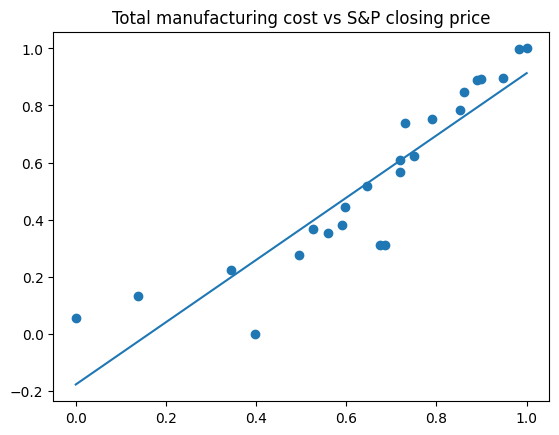

In [ ]:
regress("manufacturing", "SnP_Close")

Model slope:     0.47
Model intercept: 0.37
[0. 1.] [0.37249381 0.83786837]


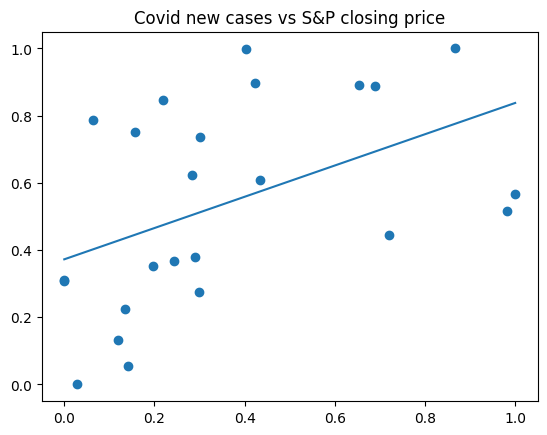

In [ ]:
regress("new_cases", "SnP_Close")

Model slope:     -0.69
Model intercept: 0.74
[0. 1.] [0.73869501 0.04995336]


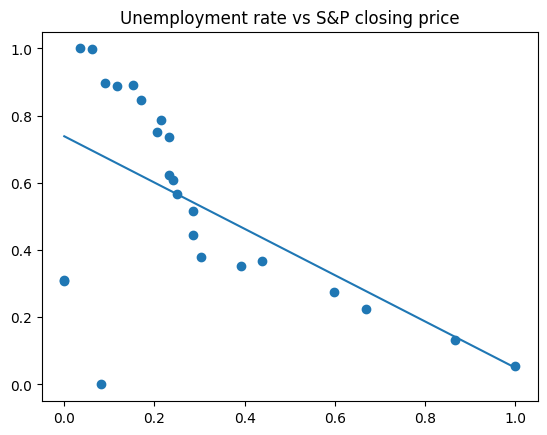

In [ ]:
regress("UNRATE", "SnP_Close")

Model slope:     1.0
Model intercept: -0.03
[0. 1.] [-0.02833269  0.97563492]


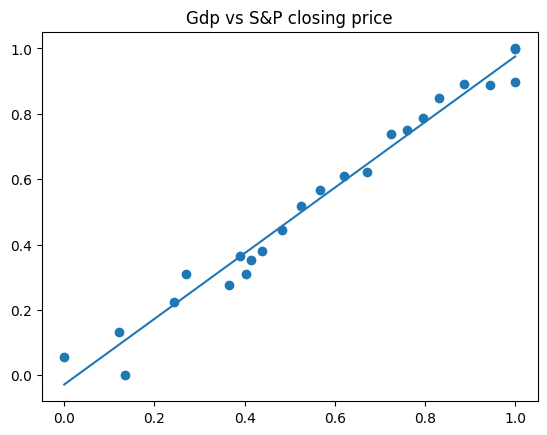

In [ ]:
regress("GDP", "SnP_Close")

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def my_k_means(X, n_clusters, rseed=2):
    # Randomly choose n_clusters cluster centres
    rng = np.random.RandomState(rseed) # random number generator
    i = rng.permutation(X.shape[0])[:n_clusters] # select n_clusters data points randomly
    centers = X[i] # set the selected data points as centers
    
    while True:
        # Assign labels based on the closest center
        cluster_labels = pairwise_distances_argmin(X, centers)
        
        # Compute new centers per cluster
        new_centers = np.array([X[cluster_labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, cluster_labels

In [ ]:
# test our k-means algorithm

X = consolidated_df.values

def cluster(a, b, k):
    i = consolidated_df.columns.get_loc(a)
    j = consolidated_df.columns.get_loc(b)

    centers, cluster_labels = my_k_means(X, k)
    plt.figure()
    plt.title(TITLE[a].capitalize() + " vs " + TITLE[b])
    plt.scatter(X[:, i], X[:, j], c=cluster_labels);
    plt.scatter(centers[:, i], centers[:, j], c='black', s=200, alpha=0.5);

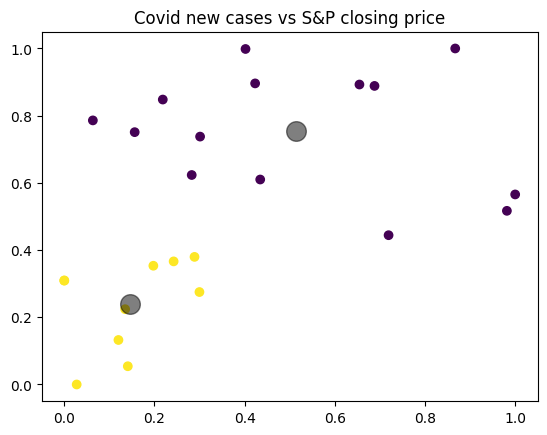

In [ ]:
cluster("new_cases", "SnP_Close", 2)

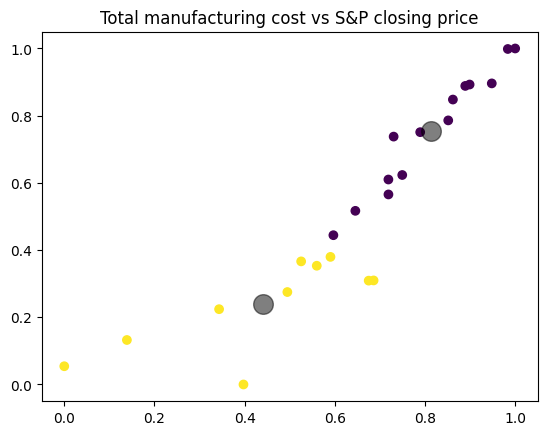

In [ ]:
cluster("manufacturing", "SnP_Close", 2)

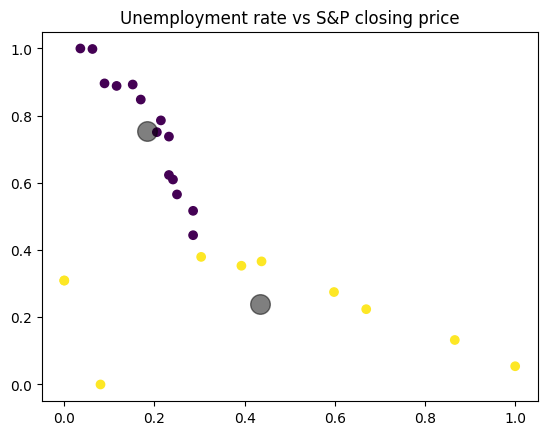

In [ ]:

cluster("UNRATE", "SnP_Close", 2)

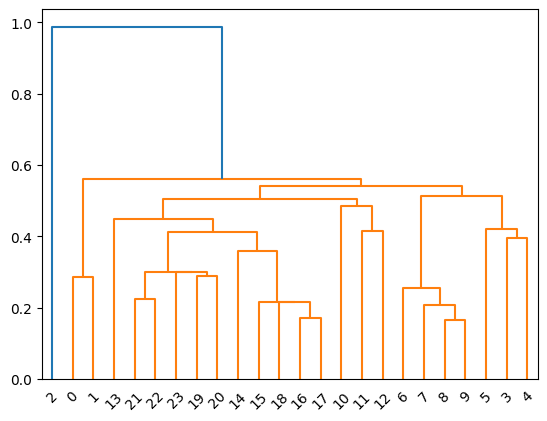

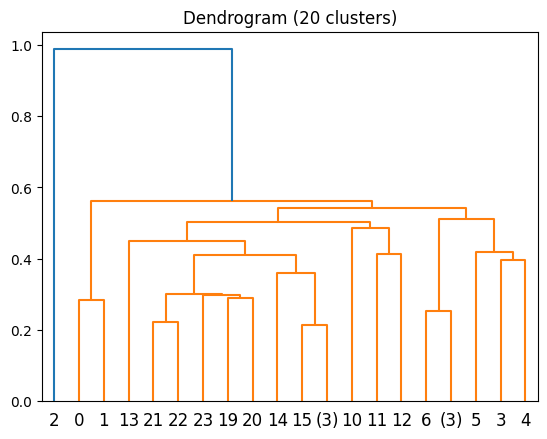

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure()
dend = shc.dendrogram(shc.linkage(X, method='single'))
plt.figure()
plt.title("Dendrogram (20 clusters)") 
dend1 = shc.dendrogram(shc.linkage(X, method='single'), p=20, truncate_mode='lastp')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

def merics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print("MAE: ", mae)
    print("MSE: ", mse)
    print("RMSE:", rmse)
    print("R2 Score: ", r2)

def train(col, ran, cross, dec):
    
    # Split the data for training and test
    X = consolidated_df.drop([col], axis = 1).values
    y = consolidated_df[col].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = ran)
    lr_model = LinearRegression(fit_intercept = True)
    lr_model.fit(X_train, y_train)

    y_pred = lr_model.predict(X_test)

    # Evaluation Metrics
    print('\nEvaluation Metrics')
    merics(y_test, y_pred)

    # Cross Validation
    print('\nCross Validation')
    mse = -cross_val_score(lr_model, X, y, cv = cross, scoring = 'neg_mean_squared_error')
    
    print('MSE = ', mse)
    print('MSE (average) = ', round(mse.mean(), dec))

In [ ]:
print("Prediction for S&P close value")
train("SnP_Close", 10, 10, 10)

Prediction for S&P close value

Evaluation Metrics
MAE:  0.08870245251194628
MSE:  0.010800519715380211
RMSE: 0.10392554890584034
R2 Score:  0.6298094960183779

Cross Validation
MSE =  [0.00755571 0.02273858 0.01128024 0.00082851 0.00063478 0.00191915
 0.0001717  0.00256982 0.00761505 0.00261088]
MSE (average) =  0.0057924425


In [2]:
import statsmodels.api as sm

# Split data into X and y
X = consolidated_df.drop('SnP_Close', axis=1)
y = consolidated_df['SnP_Close']

# Add constant term to X
X = sm.add_constant(X)

# Fit model and print results
model = sm.OLS(y, X).fit()
print(model.summary())


NameError: ignored